# **Welcome to ABDICO_parsing Code Notebook**

It is often useful to extract the main entities and actions described in a document. For example, this is useful in the Institutional Grammar (IG) for identifying some of the most common parts of an institutional statement, like the Attribute and Object, along with their Aim and Deontic.

This notebook uses new methods to automate this extraction process, giving policy scholars an easy route to some of the most common IG elements (though it's not restricted to IG, and is useful for extracting (and relating) these syntactic/semantic elements in any kind of text).

### ***This notebook performs the following tasks***


*   It takes a corpus of policy sentences from any domain and extracts four central components if the institutional grammar from each: Attribute, Aim, Deontic, and Object
  *   By default, it performs these tasks on a dataset we provide, but the intent is that users will upload their own datasets.
*   When given unlabeled data, it applies labels
*   When given labeled (such as hand-coded) data, it applies labels and compares the accuracy of its labels to those provided.
*   It outputs a downloadable file of the original statements with labels, as well as statistics and figures that can be used in reporting.



### This notebook follows an approach to automatic coding with several features

Our approach is distinct from other manual and automatic approach to IG coding:
* *It requires no training data*. You don't have to do any labelling. Labels may still be useful if you want a sense of the accuracy of our approach for your method, but such validation requires the coding of only a sample.
* *It supports users of many experience levels*. To benefit from our approach, at minimum you have to be able to get your data into the right format (the right number of spreadsheet columns in the right order), upload it, run the code, and download the outputs. You don't need to know how to program, and you don't have to understand this notebook, you just have to be bold enough to face it.  But because we expose the code, people who know how to code or are trying to learn can change it and adapt it.
* *It uses both syntactic and semantic information*. This is important because not any grammatical subject of a sentence (a syntactic property) can be an Attribute, that subject has to be some kind of agent capable of action and decision making (semantic property)
* *It is naturally robust to passive voice*. Passive voice increases the complexity of manual coding a bit, and automatic coding a lot.  Our approach works around this issue to naturally identify Attributes and Objects even when they are grammatical objects and subjects, respectively.
* *It gets better as AI gets better*. This is because the code is written to permit the switching-in of different models as "back-ends" for the labelling.
* *With minor changes it can accommodate other languages*.  For the same reason as above, if a back-end model has been written for your language you can code in that language.  
* *We do not implement the full institutional grammar* A drawback of our approach is that it only extracts the four most commonly used part of IG. A related drawback is that there are minor technical differences in how we define those entities (such as agent) and how formal IG defines them. Our operationalization is close enough that it is sufficient to be clear in reporting about where your labels came from.



# **Installation & Setup**
This code sets up the analysis. You don't have to understand it. Just run it and then scroll down.

Run these commands below for necessary installations. To run press ***ctrl+enter*** keys.

In [1]:
!git clone https://github.com/BSAkash/IG-SRL
%cd IG-SRL
!git checkout Akash
!pip install -r ./SRL/requirements.txt
!python -m spacy download en_core_web_sm
from SRL import SRL
%cd /content/

Cloning into 'IG-SRL'...
remote: Enumerating objects: 457, done.
remote: Counting objects: 100% (212/212), done.
remote: Compressing objects: 100% (153/153), done.
remote: Total 457 (delta 129), reused 132 (delta 59), pack-reused 245
Receiving objects: 100% (457/457), 5.08 MiB | 22.63 MiB/s, done.
Resolving deltas: 100% (246/246), done.
/content/IG-SRL
Branch 'Akash' set up to track remote branch 'Akash' from 'origin'.
Switched to a new branch 'Akash'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.2/730.2 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 464.5/464.5 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 82.7 MB/s eta 0:00:00
     ━━━━━━━

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


INFO:stanza:Downloading default packages for language: en (English) ...


INFO:stanza:Finished downloading models and saved to /root/stanza_resources.
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Output()

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


/content


# **Data upload**
Upload your dataset file here. Or, to see it run on an example dataset, download the provided example datafile [FPC_Siddiki.xlsx - Camden Food Security.csv](https://github.com/BSAkash/IG-SRL/blob/Akash/SRL/data/FPC_Siddiki.xlsx%20-%20Camden%20Food%20Security.csv) (from Siddiki et al., 2019), to see example outputs and to become familiar with the flow.

For your own data, you will likely have to adapt it for this notebook to run. See below for the sample format

Please name uploaded file as `main.csv` in a `.csv` file format and Policy document column should be named `raw institutional statement`

In [2]:
##allow user to upload files : Upload file should be named main.csv. Policy statement column should be named "raw institutional statement"
from google.colab import files
uploaded = files.upload()

Saving main.csv to main.csv


This is our ASF policy dataset for demonstration purpose and you do not need to run this if you have uploaded your own file in the above cell. If you still want to run this please make sure to uncomment the code in the below cell using the (ctrl+/) keys

In [3]:
#!wget -O main.csv https://storage.googleapis.com/routines_semantic/asf-policies.csv


# Applying labels

*  Run this cell to get ABDICO constiuents on "main.csv" list item
* The `.inference()` function below processes your uploaded dataset to add labels based on the text column.


In [4]:
instance = SRL.SRL(agent="strict")
instance.inference('main.csv')

main.csv


# **Download labeled data**
* Download to write the data to a file and retreive labeled data in that file.

* Download is in `.csv` format and can be opened in any spreadsheet software.

* Outputs can be found under "Attribute inf", "Object inf", "Deontic inf", "Aim inf"

In [5]:
files.download('main.csv')# Download the file and view the results here!!

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
import pandas as pd
from tabulate import tabulate
df = pd.read_csv('main.csv')
cols = ['unnamed: 0','unnamed: 3', 'section.name', 'sentences', 'root', 'keep', 'srl_ip', 'srl_parsed', 'srl_verb']
df = df.drop(columns = cols)
df

,raw institutional statement,attribute_inf,object_inf,aim_inf,deontic_inf
0,each podling in incubation must report to the ...,each podling in incubation,to the incubator pmc,report,must
1,podlings shall report monthly for their first ...,podlings,NaN,report,shall
2,"the incubator pmc may, at their discretion, as...",the incubator pmc,"to report more frequently, a podlings",ask,may
3,"the ppmc with the mentor(s) help, must produce...",the ppmc with the mentor(s ) help,"for the incubator pmc, a report",produce,must
4,there are restrictions on where podlings can h...,NaN,restrictions on where podlings can host their ...,are,NaN
...,...,...,...,...,...
162,the incubator pmc expects the source releases ...,the incubator pmc,the source releases to be staged on https://di...,expects,NaN
163,"when making a release, a podling has a choice ...",a podling,"a choice of using one of two disclaimers , the...",has,NaN
164,"if it is your first release, it is recommended...",NaN,that you use the work in progress disclaimer,recommended,NaN
165,by the time you graduate all issues listed in ...,all issues listed in the disclaimer,to have been corrected,need,NaN


# **Extra: Calculate accuracy of labels compared to pre-existing labels**
If the uploaded data has columns for labels that were applied by another method (e.g. manually), this code will compare the computed labels to the pre-existing labels. Make sure that the originally uploaded file has the following format:
* Please name uploaded file as `main.csv` in a `.csv` file format and Policy document column should be named `raw institutional statement`.

* That is the format reflected in the sample data we provide with this notebook.

The statistic we provide a is typical useful summary statistic for classifiers of this type. Specifically, we provide F1, an alternative to accuracy that is suitable for evaluating a classifier when its labels are rare. Like accuracy, F1 ranges from 0 to 1. Read more about F1 score [here](https://towardsdatascience.com/the-f1-score-bec2bbc38aa6)



* Run this cell to check performance of the notebook on other datasets
* The box plots below illustrate the range of F1 scores for each type of detected element.
* Any contributions to the dataset can be viewed in the evaluation results below which includes several datasets along with yours!!

/content/IG-SRL/SRL/data/FPC_Siddiki.xlsx - Colorado Food Systems Advisory.csv
 F1 score for attribute: 0.621413110698825
 F1 score for object: 0.6868502063619089
 F1 score for deontic: 0.8632478632478632
 F1 score for aim: 0.7348484848484848
/content/IG-SRL/SRL/data/FPC_Siddiki.xlsx - Saint Paul Ramsey.csv
 F1 score for attribute: 0.7718360071301248
 F1 score for object: 0.6121417797888385
 F1 score for deontic: 0.9411764705882353
 F1 score for aim: 0.6862745098039216
/content/IG-SRL/SRL/data/FPC_Siddiki.xlsx - New Haven FPC.csv
 F1 score for attribute: 0.4795918367346939
 F1 score for object: 0.4989898710961329
 F1 score for deontic: 0.8125
 F1 score for aim: 0.65625
/content/IG-SRL/SRL/data/FPC_Siddiki.xlsx - Denver Sustainable FPC.csv
 F1 score for attribute: 0.7083333333333333
 F1 score for object: 0.8333333333333334
 F1 score for deontic: 1.0
 F1 score for aim: 0.7777777777777777
/content/IG-SRL/SRL/data/FPC_Siddiki.xlsx - Camden Food Security.csv
 F1 score for attribute: 0.80972

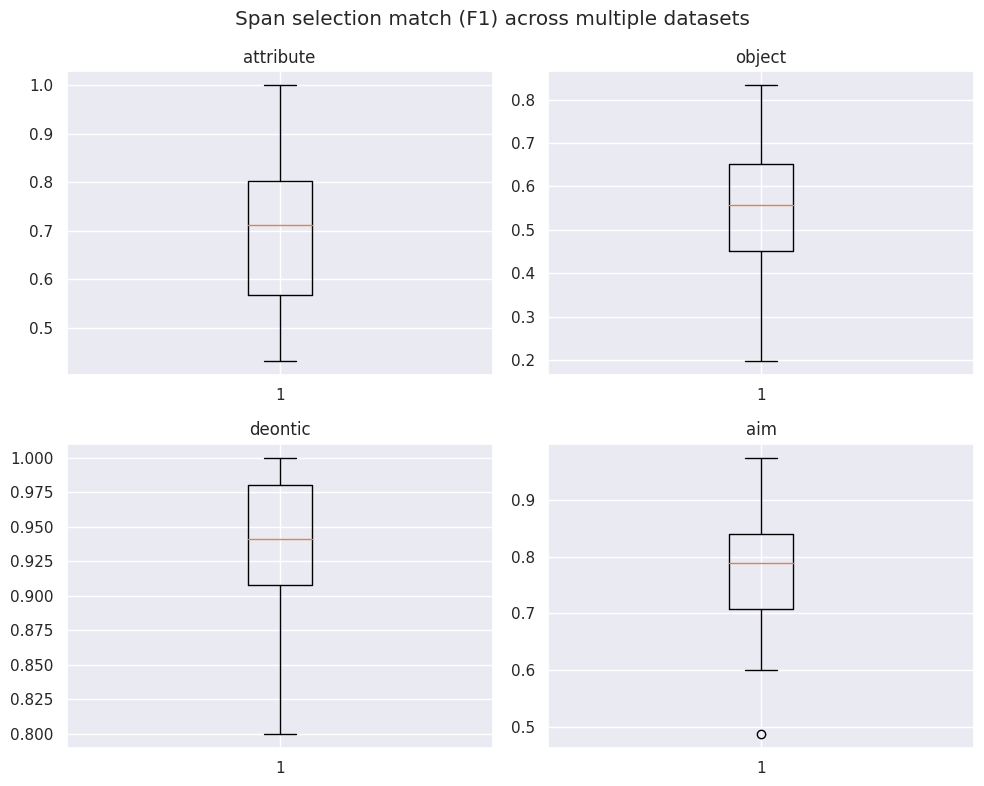

In [7]:
evaluation = SRL.SRL()
plt = evaluation.srl_eval()
plt.tight_layout()
plt.show()